# The Sparks Foundation - Data Science and Business Analytics Internship

## Task1 : Prediction using Supervised Machine Learning


Task Description -
Predicting the students score depending on the hours they studied

### 1. Importing the required libraries

In [5]:
import pandas as pd              #for the dataframe 
import matplotlib.pyplot as plt  #for the data visualization
import numpy as np               #for calculations

%matplotlib inline

### 2. Retrieving the data using Pandas library

In [12]:
url = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

data = pd.read_csv(url)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [13]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### 3. Visualizing the data using scatter plot

Text(0.5, 1.0, 'Hours studied vs Scores obtained')

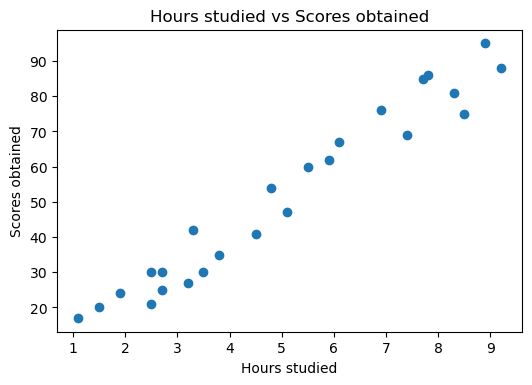

In [9]:
plt.figure(dpi=100)
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel("Hours studied")
plt.ylabel("Scores obtained")
plt.title("Hours studied vs Scores obtained")

### 4. Splitting the data in Dependent, Independent variables using iloc, train_test_split

In [18]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [19]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state =0)

### 5. Training the algorithm

In [20]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression()
lr.fit(x_train,y_train)
print("Trained data")

Trained data


In [26]:
lr.coef_

array([9.91065648])

In [27]:
lr.intercept_

2.018160041434683

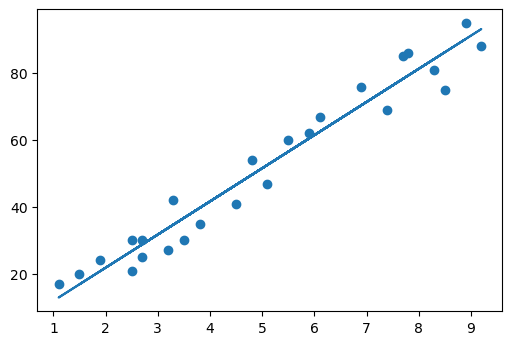

In [21]:
line = lr.coef_ * x + lr.intercept_

plt.figure(dpi=100)
plt.scatter(x,y)
plt.plot(x,line)

### 6. Making predictions

In [22]:
y_pred = lr.predict(x_test)
df = pd.DataFrame({"actual":y_test, "Predicted":y_pred})
df

,actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [28]:
h = float(input("Enter the no of hours studied: "))

Enter the no of hours studied: 9.25


In [29]:
hour = np.array(h)

In [30]:
reshaped_h = hour.reshape(-1,1)

In [31]:
predicted_score = lr.predict(reshaped_h)

print(f'Predicted Score of a student who studied for {h} hours is {predicted_score[0]}')

Predicted Score of a student who studied for 9.25 hours is 93.69173248737538


### 7. Evaluating the model

In [15]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))

MAE:  4.183859899002975
